In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import imutils
from matplotlib.colors import hsv_to_rgb

%matplotlib inline

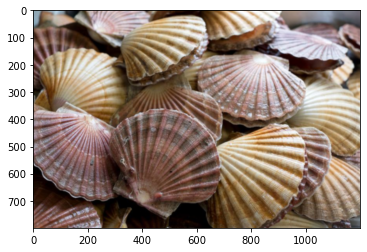

In [5]:
# open image (cv2 opens it in BGR)
img = cv2.imread('./assets/coq2.jpg')
img = imutils.resize(img, width=1200)

# blur image before all
img = cv2.GaussianBlur(img, (5, 5), 0)

# Convert to rgb and hsv
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)

plt.imshow(rgb)

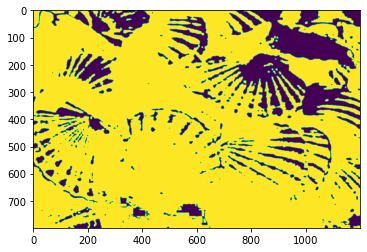

In [6]:
# initial values
min_red, min_green, min_blue = 0, 30, 0
max_red, max_green, max_blue = 255, 255, 255

#display the initial masks
mask = cv2.inRange(hsv, (min_blue, min_green, min_red), (max_blue, max_green, max_red))
mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)
plt.imshow(mask)

In [1]:
import pandas as pd


In [53]:
df = pd.read_pickle('contours_df.pkl')
df

,contour,center,radius,lengh,state
0,"[[[0, 0]], [[0, 1332]], [[1199, 1332]], [[1199...","(599, 666)",896,46.666667,NOISE
1,"[[[985, 996]], [[986, 995]], [[1009, 995]], [[...","(993, 1154)",178,9.270833,BAD
2,"[[[1127, 1120]]]",None,None,None,NOISE
3,"[[[897, 1080]], [[896, 1081]], [[887, 1081]], ...",None,None,None,NOISE
4,"[[[1085, 1062]], [[1085, 1063]], [[1084, 1064]...",None,None,None,NOISE
...,...,...,...,...,...
970,"[[[242, 28]], [[242, 29]], [[243, 28]], [[244,...",None,None,None,NOISE
971,"[[[239, 27]]]",None,None,None,NOISE
972,"[[[221, 23]], [[220, 24]], [[215, 24]], [[215,...",None,None,None,NOISE
973,"[[[254, 21]]]",None,None,None,NOISE


In [54]:
max_lengh = df.sort_values(by='lengh', ascending=False).iloc[0]['lengh']
df.loc[df.lengh==max_lengh, 'state'] = 'GOOD'

In [56]:
df

,contour,center,radius,lengh,state
0,"[[[0, 0]], [[0, 1332]], [[1199, 1332]], [[1199...","(599, 666)",896,46.666667,GOOD
1,"[[[985, 996]], [[986, 995]], [[1009, 995]], [[...","(993, 1154)",178,9.270833,BAD
2,"[[[1127, 1120]]]",None,None,None,NOISE
3,"[[[897, 1080]], [[896, 1081]], [[887, 1081]], ...",None,None,None,NOISE
4,"[[[1085, 1062]], [[1085, 1063]], [[1084, 1064]...",None,None,None,NOISE
...,...,...,...,...,...
970,"[[[242, 28]], [[242, 29]], [[243, 28]], [[244,...",None,None,None,NOISE
971,"[[[239, 27]]]",None,None,None,NOISE
972,"[[[221, 23]], [[220, 24]], [[215, 24]], [[215,...",None,None,None,NOISE
973,"[[[254, 21]]]",None,None,None,NOISE


In [58]:
def distance(pt1, pt2):
    x, y = pt1
    a, b = pt2
    dist = (x-a)**2 + (y-b)**2
    
    return dist**0.5

tu1 = (20, 10)
tu2 = (0, 0)

print(type(tu1))

distance((0, 10), (0, 0))

<class 'tuple'>


10.0